# Titanic: Machine Learning from Disaster

The following project is my solution for Kaggle's "Titanic: Machine Learning from Disaster" project. The primary goals I hope to accomplish is to utilize and demonstrate traditional Machine Learning methods. More information about this project can be found at: https://www.kaggle.com/c/titanic.  

I am going to try a variety of approaches starting with one that I have worked on in the past (found here at https://github.com/rohitvinnakota/Investigating-Titanic-Data). I will be using my initial prediction as a foundation to test other ML methods on. I will be using the scikit-learn python library to handle the majority of my number crunching. There are 2 datasets provided. The "training set" and the "testing set". The training set is used to derive models and estimations from and the test set is used to see how accurately the derived model can predict whether a passenger survived or not. To start with, let us import the test set into our code and see what it looks like. We can use libraries such as NumPy or Pandas in Python to do so.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


#Reading the training data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#Getting an overview of what data looks like
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From a quick glance at the data and referencing Kaggle. We have the following variables to work with:

1) PassengerId: Unique ID for each passenger 

2) Survived: 0 = No, 1 = Yes

3) Pclass:  1st = Upper
            2nd = Middle
            3rd = Lower
            
            This refers to the socio economic status of the passenger


4) Age

5) SibSp: Number of siblings and/or spouses for the passenger

6) Parch: Number of parents and/or children for the passenger

7) Fare


We can generate 3 charts to see the association between age, gender, and class on survival. First, let us check each of these independently. While there are other variables, they either have too much missing data or are irrelevant to the data at hand(Cabin, Embarket, Ticket, Name).

C:\Users\Vinnakotas\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0,0.5,'Percentile that survived'), Text(0.5,0,'Class')]

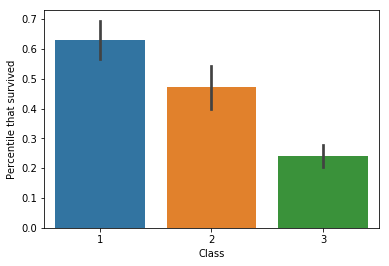

In [2]:
g1 = sns.barplot(data =train_data,x='Pclass',y='Survived')
g1.set(xlabel = 'Class', ylabel = 'Percentile that survived')

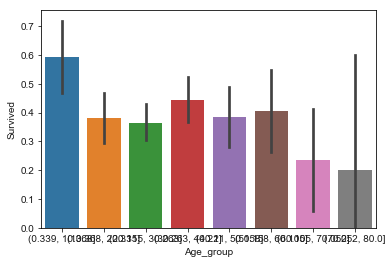

In [3]:
train_data['Age_group'] = pd.cut(train_data['Age'], bins= 8, include_lowest=True)
g2 = sns.barplot(data =train_data,x='Age_group',y='Survived',orient =0)
sns.set_context("poster",font_scale=1)
sns.set(rc={'figure.figsize':(1,8.27)})

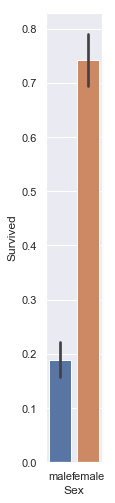

In [4]:
sns.barplot(data = train_data, x='Sex',y='Survived')
sns.set(rc={'figure.figsize':(4,5)})

As we can see from the data above, children under the age of 10, class 1, and females have the highest chance of survival. 

Note that this project is an example of supervised learning. i.e. there is training data that already exists and our model relies on insights gained from said data. We can approach this using either a regression based approach or a classification based approach. Since our target variable (Survived) is categorical, a classification based one seems to be the most appropriate. To begin with, let us construct a simple decision tree using sklearn

In [5]:
from sklearn.tree import DecisionTreeClassifier

transformed_train = pd.get_dummies(train_data, columns=['Sex'])
transformed_test = pd.get_dummies(test_data, columns=['Sex'])

transformed_train.head()
#We have to assign numerical values to our categorial variables to prevent
# ValueErros from the DecisionTreeClassifier


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,"(20.315, 30.263]",0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,"(30.263, 40.21]",1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20.315, 30.263]",1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,"(30.263, 40.21]",1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,"(30.263, 40.21]",0,1
